# Visualise long tail problem and other eda 

In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
parent_dir = '../../../'

In [79]:
# plot params:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'EAEAF2' # white or EAEAF2

#### Investigate Long Tail Problem:

In [4]:
ratings = pd.read_csv(parent_dir + 'data/mod_ratings_lc', index_col = 0)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [5]:
count_ratings = {}
for movie in ratings['movieId']:
    count_ratings[movie] = count_ratings.get(movie, 0) + 1
len(count_ratings)

9724

In [9]:
sorted_high_rated = sorted(count_ratings.items(), key = lambda x: x[1], reverse = True)

In [48]:
sorted_high_rated[-4000:]

array([[  2332,      2],
       [  2962,      2],
       [  3830,      2],
       ...,
       [160836,      1],
       [163937,      1],
       [163981,      1]])

In [31]:
x, y = list(count_ratings.keys()), list(count_ratings.values())

In [32]:
type(x)

list

In [33]:
type(y)

list

In [51]:
sns.countplot(x = x, y = y)

TypeError: Cannot pass values for both `x` and `y`

In [52]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [54]:
num_ratings = ratings.groupby('movieId').count().drop('userId', axis = 1)

In [55]:
num_ratings.head()

,rating
movieId,
1,215
2,110
3,52
4,7
5,49


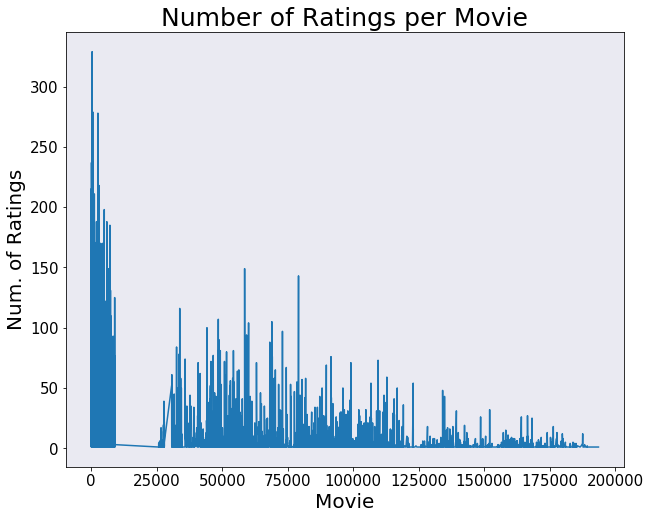

In [80]:
plt.subplots(figsize = (10, 8))
plt.plot(num_ratings)
plt.title('Number of Ratings per Movie')
plt.xlabel('Movie')
plt.ylabel('Num. of Ratings')
plt.show();

In [76]:
sorted_num_ratings = num_ratings.sort_values(by = 'rating', axis = 0, ascending = False)

In [77]:
sorted_num_ratings.head()

,rating
movieId,
356,329
318,317
296,307
593,279
2571,278


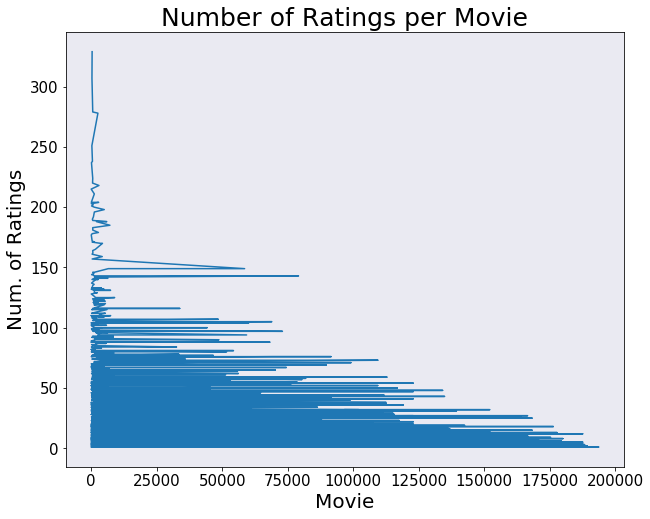

In [81]:
plt.subplots(figsize = (10, 8))
plt.plot(sorted_num_ratings)
plt.title('Number of Ratings per Movie')
plt.xlabel('Movie')
plt.ylabel('Num. of Ratings')
plt.show();

Don't know why the fuck it's sideways like that 🤬